# Instruções

1. Resolva todos os exercícios abaixo.
2. Salve uma cópia desse notebook em um repositório no GitHub.
3. Envie o link do repositório criado para o professor.
4. Envie um áudio curto ao professor explicando cada solução criada por você.

# 1. Extração de Região de Interesse (ROI)

Dessa vez você vai criar uma função chamada crop(). Essa função receberá por parâmetro uma imagem, uma posição x, y e uma altura e largura. A função deverá retornar o pedaço recortado.

Suponha a imagem abaixo, que chamaremos de messiImg.

<img src="https://i.stack.imgur.com/6QscS.jpg"/>

Se sua função for chamada assim:

x_bola = 336
y_bola = 287
largura_bola = 163
altura_bola = 49
ballImg = crop(messiImg, x_bola, y_bola, largura_bola, altura_bola)

Ao final, ballImg deve conter apenas a imagem da bola.

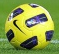

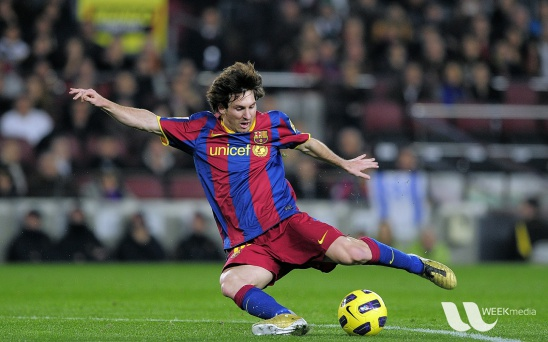

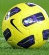

In [ ]:
# Resolução:

from google.colab.patches import cv2_imshow
import cv2
import os

def main():
  arquivos_upados = os.listdir('/content')
  for item in arquivos_upados:
    caminho_item = "/content/" + item
    if item.endswith(".jpg"):
      image = cv2.imread(caminho_item)
      cv2_imshow(image)
      x_bola = 336
      y_bola = 287
      largura_bola = 163
      altura_bola = 49 
      crop(image, x_bola, y_bola, largura_bola, altura_bola)
      

def crop(image, x_bola, y_bola, altura_bola, largura_bola):
  crop_img = image[y_bola:y_bola+altura_bola, x_bola:x_bola+largura_bola]
  cv2_imshow(crop_img)
  cv2.imwrite("imagem-cortada.png", crop_img)



if __name__ == "__main__":
    main()


# 2. Colar Imagem

Agora você criará uma função que "cola" uma imagem menor em uma imagem maior.

Crie uma função chamada paste() que receberá, como parâmetro, uma imagem src (source), uma imagem dst (destiny) e uma posição x, y qualquer. Ela retornará a imagem modificada.

A imagem dst será "colada" na posição x, y da imagem src. Confira o exemplo abaixo.

newImg = paste(messiImg, ballImg, x, y)

É assim que ficará a imagem "newImg" (de acordo com a posição x e y)

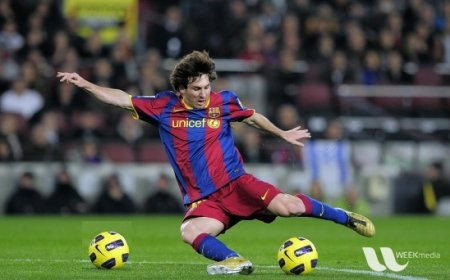

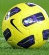

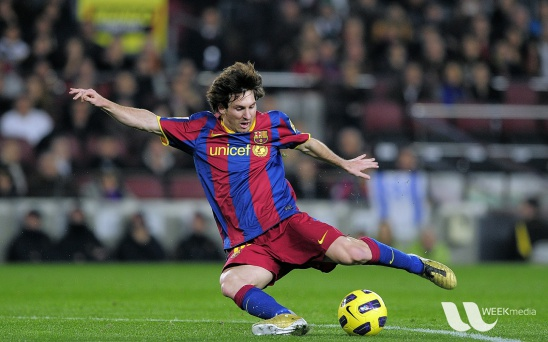

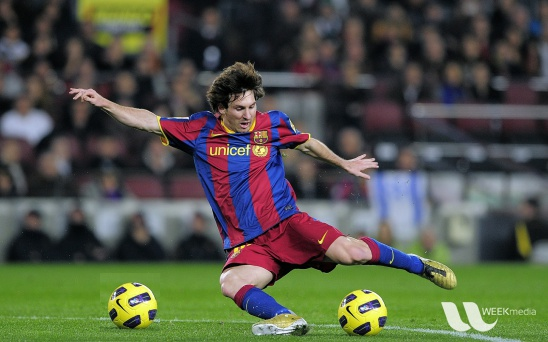

In [ ]:
# Resolução:

from google.colab.patches import cv2_imshow
import cv2
import os

def main():
  source = cv2.imread("/content/imagem-cortada.png")
  cv2_imshow(source)
  destiny = cv2.imread("/content/6QscS.jpg")
  cv2_imshow(destiny)
  paste(source, destiny, 100, 270)

def paste(src, dst, x, y):
  bola = dst[280:340, 330:390]
  dst[273:333, 100:160] = bola
  cv2_imshow(dst)
  cv2.imwrite("colagem.png", dst)



if __name__ == "__main__":
    main()


# 3. Trabalhando com Canais de Cores

Dessa vez, você deverá criar um algoritmo para saber qual imagem é mais "vermelha", "verde" ou "azul".

Para isso, você deverá pegar uma imagem qualquer e extrair cada um dos canais dela, em separado. Assim, você irá gerar 3 novas imagens, uma contendo apenas o canal vermelho, outra contendo somente o verde e a última, azul.

<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/RGB_channels_separation.png"/>

A seguir, você tirará a média de cores da imagem (somar os tons de todos os pixels e dividir pelo total de pixels). Se a imagem do canal vermelho tiver a maior média, então a imagem é mais "vermelha" e assim por diante!

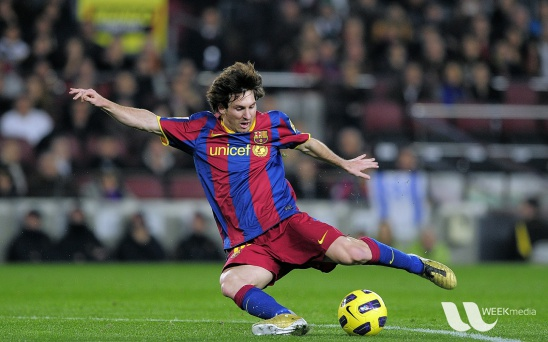

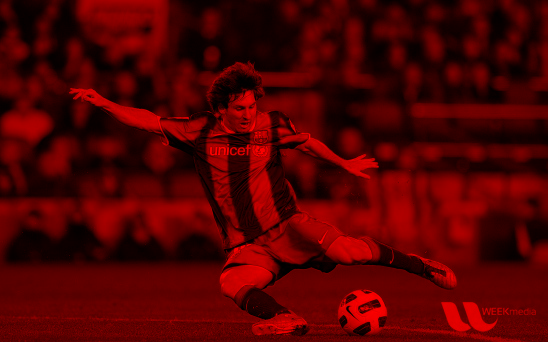

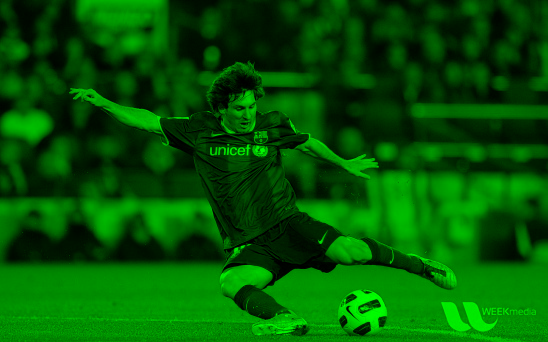

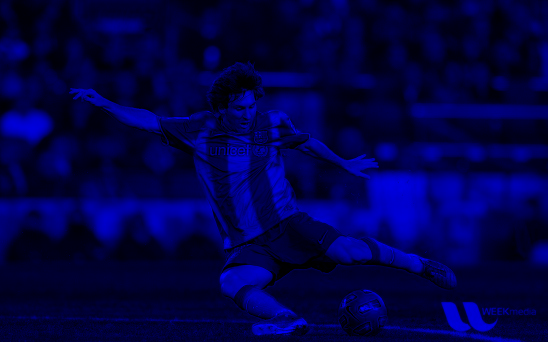

Blue Average: 72.40776134374866
Green Average: 86.04769603449012
Red Average: 82.16838476971016

The original image is 'more green'.


In [ ]:
# Resolução

import cv2
from matplotlib import pyplot as plt

def main():
  original_image = cv2.imread("/content/6QscS.jpg")
  cv2_imshow(original_image)
  
  red_image = original_image.copy()
  green_image = original_image.copy()
  blue_image = original_image.copy()

  averageRed = saveRedImage(red_image)
  averageGreen = saveGreenImage(green_image)
  averageBlue = saveBlueImage(blue_image)

  print("Blue Average: " + str(averageBlue) + "\nGreen Average: " + str(averageGreen) + "\nRed Average: " + str(averageRed))

  if ((averageBlue > averageRed) and (averageBlue > averageGreen)):
    print("\nThe original image is 'more blue'.")
  elif ((averageRed > averageBlue) and (averageRed > averageGreen)):
    print("\nThe original image is 'more red'.")
  else:
    print("\nThe original image is 'more green'.")


def saveBlueImage(img):
  altura, largura, canais = img.shape
  qntBlue = 0
  averageBlue = 0
  for y in range(0, altura):
    for x in range(0, largura):
      blue = img.item(y, x, 0)
      green = img.item(y, x, 1)
      red = img.item(y, x, 2)

      #imagem apenas com tom azul
      img.itemset((y, x, 1), 0)
      img.itemset((y, x, 2), 0)

      qntBlue = qntBlue + blue
 
  #exibindo nova imagem
  cv2_imshow(img)
  #criando nova imagem
  cv2.imwrite("blue-image.png", img)

  averageBlue = qntBlue/qntPixel(img)
  return averageBlue

def saveRedImage(img):
  altura, largura, canais = img.shape
  qntRed = 0
  averageRed = 0
  for y in range(0, altura):
    for x in range(0, largura):
      blue = img.item(y, x, 0)
      green = img.item(y, x, 1)
      red = img.item(y, x, 2)

      #imagem apenas com tom vermelho
      img.itemset((y, x, 0), 0)
      img.itemset((y, x, 1), 0)

      qntRed = qntRed + red
 
  #exibindo nova imagem
  cv2_imshow(img)
  #criando nova imagem
  cv2.imwrite("red-image.png", img)

  averageRed = qntRed/qntPixel(img)
  return averageRed

def saveGreenImage(img):
  altura, largura, canais = img.shape
  qntGreen = 0
  averageGreen = 0
  for y in range(0, altura):
    for x in range(0, largura):
      blue = img.item(y, x, 0)
      green = img.item(y, x, 1)
      red = img.item(y, x, 2)
    
      #imagem apenas com tom verde
      img.itemset((y, x, 0), 0)
      img.itemset((y, x, 2), 0)

      qntGreen = qntGreen + green
 
  #exibindo nova imagem
  cv2_imshow(img)
  #criando nova imagem
  cv2.imwrite("green-image.png", img)

  averageGreen = qntGreen/qntPixel(img)
  return averageGreen

def qntPixel(img):
  altura, largura, canais = img.shape
  return altura * largura


if __name__ == "__main__":
  main()

# 4. Criando o ouriço brasileiro

Existe um jogo na Internet chamado "Brasonic", que consiste numa versão tupiniquim do ouriço mais popular dos jogos, Sonic. Basicamente, ele é uma versão do personagem trocando suas cores pelo verde e amarelo da bandeira nacional.

Nesse exercício, você deverá fazer um algoritmo que "recebe" uma imagem do Sonic e "troca" suas cores para o verde e amarelo. Para tal, modifique os pixels e salve a nova imagem em disco!

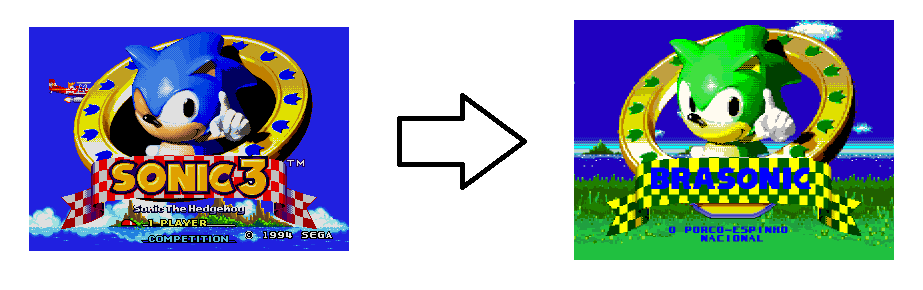

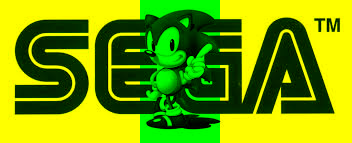

In [110]:
# Resolução

import numpy as np
import cv2, os
from matplotlib import pyplot as plt

def getColor(img,x,y):
    return img.item(y,x,0), img.item(y,x,1),img.item(y,x,2)

def setColor(img, x,y, b, g, r):
    img.itemset((y,x,0), b)
    img.itemset((y,x,1), g)
    img.itemset((y,x,2), r)

def main():
  img = cv2.imread("transferir.jpg")
  altura, largura, canais = img.shape

  for y in range(0,altura):
    for x in range(0,largura):
      blue = img.item(y, x, 0)
      green = img.item(y, x, 1)
      red = img.item(y, x, 2)

      img.itemset((y,x,0), 0)

  for y in range(0,altura):
    for x in range(140, 220):
      blue = img.item(y, x, 0)
      green = img.item(y, x, 1)
      red = img.item(y, x, 2)

      img.itemset((y,x,2), blue)

  #exibindo nova imagem
  cv2_imshow(img)
  #criando nova imagem
  cv2.imwrite("sonic-br.jpg",img)

if __name__ == "__main__":
  main()

# 5. Junte pessoas usando Alpha Blending

No vídeo abaixo (um pouco mais antigo) eu fiz uma "brincadeira" misturando o rosto de dois políticos brasileiros que antagonizam. Eu fiz isso usando a técnica de transparência por alpha blending. 

<a href="https://www.youtube.com/watch?v=_NRIjiFnYlM"><img src="https://img.youtube.com/vi/_NRIjiFnYlM/mqdefault.jpg"/></a>

Agora é a sua vez! Pegue duas fotos (se você se sentir a vontade, pode ser uma sua e de um amigo que concorde) e crie uma versão híbrida de vocês.

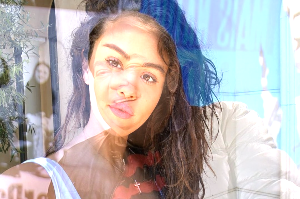

In [125]:
# Resolução

import cv2
import numpy as np

faustao = cv2.imread("faustao.jpg")
fautao_flip = cv2.flip(faustao,1)
selena = cv2.imread("selena.jpg")

alturaF, larguraF, _ = fautao_flip.shape
selena = cv2.resize(selena, (larguraF, alturaF))

filhx = cv2.addWeighted(selena, 1, fautao_flip, 0.5, 0)

alturaFi, larguraFi, _ = filhx.shape
filhx = cv2.resize(filhx, (int(larguraFi * 0.25), int(alturaFi * 0.25)))

#ver x criancinhx
cv2_imshow(filhx)